### Import Libraries

In [1]:
import re
import nltk  # For the stopwords, if needed
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd


ModuleNotFoundError: No module named 'nltk'

### Read Data & Create Documents

In [ ]:
def read_document(document):  
    try:
        with open(document, 'r') as f:
            data = f.read()
        return data
      
    except IOError:
        print("Error opening or reading input file: ", document)

corpus = read_document("./data/tweets.txt")
corpus[1:100]

'\'And so the robots spared humanity ... https://t.co/v7JUJQWfCv\'\n"b""@ForIn2020 @waltmossberg @mims '

In [ ]:
def pre_process_corpus(corpus):
    # Split by new line
    preproc_corpus = corpus.split("\n")

    # Some cases with new line in the middle of sentences
    preproc_corpus = [re.sub(r"\\n", " ", str(d)) for d in corpus.split("\n")]

    # Remove the unicode fragments
    preproc_corpus = [re.sub(r"\\\w+", "", str(d)) for d in preproc_corpus]

    # Convert to lower case
    preproc_corpus = [d.lower() for d in preproc_corpus]

    # Remove mentions
    preproc_corpus = [re.sub("@\S+", "", d) for d in preproc_corpus]

    # Remove urls
    preproc_corpus = [re.sub("https?:\/\/.*[\r\n]*", "", d) for d in preproc_corpus]

    # Remove other unwanted characters & whitespace
    preproc_corpus = [re.sub('\W+'," ", d).strip() for d in preproc_corpus]

    # Remove bs
    preproc_corpus = [d[2:] for d in preproc_corpus if d]

    # Remove RT (retweet) RIFAR
    preproc_corpus = [re.sub('rt'," ", d).strip() for d in preproc_corpus] 

    return preproc_corpus

preproc_corpus = pre_process_corpus(corpus)

In [ ]:
def get_frequencies(documents):
    """ 
    Calculates frequencies of words
    if corpus, i.e. list of strings is provided, 
    it does it for the whole corpus
    """
    if isinstance(documents, list):
        documents = " ".join(documents)

    freq_dist = {}
    for token in documents.split(" "):
        if token in freq_dist.keys():
            freq_dist[token] += 1
        else:
            freq_dist[token] = 1
    return freq_dist

get_frequencies(preproc_corpus)

{'and': 428,
 'so': 102,
 'the': 1169,
 'robots': 3,
 'spared': 1,
 'humanity': 15,
 'exactly': 32,
 'tesla': 347,
 'is': 557,
 'absurdly': 1,
 'overvalued': 1,
 'if': 93,
 'based': 6,
 'on': 423,
 'past': 5,
 'but': 195,
 'that': 288,
 's': 406,
 'irr': 1,
 'et': 27,
 'tu': 1,
 'walt': 1,
 'stormy': 4,
 'weather': 22,
 'in': 569,
 'shortville': 2,
 'coal': 6,
 'dying': 2,
 'due': 28,
 'to': 1020,
 'nat': 1,
 'gas': 20,
 'fracking': 1,
 'it': 327,
 'basically': 6,
 'dead': 7,
 'just': 161,
 'a': 758,
 'helicopter': 3,
 'clothing': 1,
 'won': 20,
 't': 187,
 'matter': 10,
 'pretty': 6,
 'good': 135,
 'why': 32,
 'did': 22,
 'we': 228,
 'waste': 1,
 'much': 51,
 'time': 78,
 'developing': 4,
 'silly': 3,
 'rockets': 10,
 'damn': 4,
 'you': 175,
 'aliens': 7,
 'obtuse': 1,
 'have': 101,
 'all': 137,
 'this': 212,
 'crazy': 12,
 'tech': 9,
 'can': 89,
 'speak': 2,
 'english': 2,
 'technology': 16,
 'breakthrough': 3,
 'turns': 6,
 'out': 83,
 'chemtrails': 1,
 'are': 171,
 'actually': 38,


In [ ]:
def remove_words(corpus):
    freq_dist = get_frequencies(corpus)

    # Remove Rare Words
    preproc_corpus = [" ".join([token for token in d.split() if (freq_dist[token] > 1)]) for d in corpus]

    # Remove Frequent Words
    most_freq = max(freq_dist.values())
    preproc_corpus = [" ".join([token for token in d.split() if (freq_dist[token] < most_freq)]) for d in preproc_corpus]

    # Remove Stopwords
    nltk.download('stopwords')
    stop_words = set(nltk.corpus.stopwords.words('english'))
    preproc_corpus = [" ".join([token for token in d.split() if (token not in stop_words)]) for d in preproc_corpus]

    return preproc_corpus

preproc_corpus = remove_words(preproc_corpus)
preproc_corpus

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\veine\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['robots humanity',
 'exactly based past',
 'et',
 'stormy weather shortville',
 'coal dying due gas basically dead',
 'helicopter helicopter',
 'matter',
 'pretty good',
 'much time developing silly rockets damn aliens crazy tech speak english',
 'technology breakthrough turns actually message time aliens describing secret',
 'created world first spam ai entirely simulation deployed physical robot',
 'extremely important reusable rockets bring us much closer becoming',
 'def p100d ludicrous although rocket starts going lot faster',
 'def bring back like dragon question much weight need add',
 'working',
 'looks like could 20 structural upgrades handle higher loads fully expendable mode',
 'lot',
 'thing imagine secret payload 1st dragon flight giant wheel cheese inspired b',
 'good point odds go 0 gt 0',
 'falcon heavy test flight currently scheduled late summer',
 'considering trying bring upper stage back falcon heavy demo flight full reusability odds success low maybe worth shot',


In [ ]:
vec = CountVectorizer()
X = vec.fit_transform(preproc_corpus)
df = pd.DataFrame(X.toarray(), columns = vec.get_feature_names())
print(df)

      00  000  01  01am  10  100  1000  100d  10m  10pm  ...  yep  yes  \
0      0    0   0     0   0    0     0     0    0     0  ...    0    0   
1      0    0   0     0   0    0     0     0    0     0  ...    0    0   
2      0    0   0     0   0    0     0     0    0     0  ...    0    0   
3      0    0   0     0   0    0     0     0    0     0  ...    0    0   
4      0    0   0     0   0    0     0     0    0     0  ...    0    0   
...   ..  ...  ..   ...  ..  ...   ...   ...  ...   ...  ...  ...  ...   
2814   0    0   0     0   0    0     0     0    0     0  ...    0    0   
2815   0    0   0     0   0    0     0     0    0     0  ...    0    0   
2816   0    0   0     0   0    0     0     0    0     0  ...    0    0   
2817   0    0   0     0   0    0     0     0    0     0  ...    0    0   
2818   0    0   0     0   0    0     0     0    0     0  ...    0    0   

      yesterday  yet  yo  york  yrs  yup  zero  zone  
0             0    0   0     0    0    0     0     0  
1

c:\Marci\Suli\UAB\MBD\.venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
# Find frequencies
freq_dist = get_frequencies(preproc_corpus)

# Make a list of the more frequent words
most_freq = max(freq_dist.values())
most_relevant = [k for k in freq_dist if (freq_dist[k] == most_freq)]


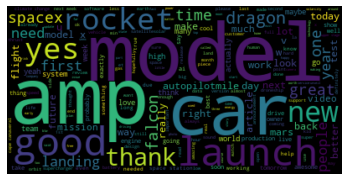

In [ ]:
wordcloud = WordCloud().generate(" ".join(preproc_corpus))

# Display the generated image:

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
